Project in Microeconometrics | M.Sc. Economics, University of Bonn | **Minh-Tri Hoang**

# The replication report on "Marrying Up: The Role of Sex Ratio in Assortative Matching" by Abramitzky Ran, Adeline Delavande, and Luis Vasconcelos (2011)

This notebook contains my replication for the following paper:
>Ran Abramitzky, Adeline Delavande, Luis Vasconcelos. (2011).  ["Marrying Up: The Role of Sex Ratio in Assortative Matching"](https://www.aeaweb.org/articles?id=10.1257/app.3.3.124). American Economic Journal: Applied Economics, 3(3), 124-57.

**Information about replication and transparency:**
* For the replication, I try to remain the original structure of the paper so that readers can easily follow along and compare.

* My Python scripts, which are used to replicate main results of the paper, can also be found on the auxiliary folder of my repository [here](https://github.com/mtrihoang/marry-up/tree/main/auxiliary).

* The original dataset and Stata do-files used in the paper can be accessed [here](https://www.openicpsr.org/openicpsr/project/113789/version/V1/view?path=/openicpsr/113789/fcr:versions/V1/data---code&type=folder).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li>
<li><span><a href="#2.-Historical-Context" data-toc-modified-id="2.-Historical-Context">2. Historical Context</a></span><ul class="toc-item">
    </ul></li>
<li><span><a href="#3.-Identification" data-toc-modified-id="3.-Identification">3. Identification</a></span></li>
<li><span><a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy">4. Empirical Strategy</a></span></li>
<li><span><a href="#5.-Replication-of-Abramitzky-et-al.-(2011)" data-toc-modified-id="5.-Replication-of-Abramitzky-et-al.-(2011)">5. Replication of Abramitzky et al. (2011)</a></span><ul class="toc-item">
    <li><span><a href="#5.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="5.1.-Data-&amp;-Descriptive-Statistics">5.1. Data &amp; Descriptive Statistics</a></span></li>
    <li><span><a href="#5.2.-Results" data-toc-modified-id="5.2.-Results">5.2. Results</a></span><ul class="toc-item">
        <li><span><a href="#5.2.1.-The-Impact-of-Male-Scarcity-on-Marital-Status" data-toc-modified-id="5.2.1.-The-Impact-of-Male-Scarcity-on-Marital-Status">5.2.1. The Impact of Male Scarcity on Marital Status</a></span></li>
        <li><span><a href="#5.2.2.-The-Impact-of-Male-Scarcity-on-Assortative-Matching-by-Social-Class" data-toc-modified-id="5.2.2.-The-Impact-of-Male-Scarcity-on-Assortative-Matching-by-Social-Class">5.2.2. The Impact of Male Scarcity on Assortative Matching by Social Class</a></span><ul class="toc-item">
            <li><span><a href="#A.-Assigning-Social-Classes-Based-on-the-Historical-International-Social-Class-Scheme" data-toc-modified-id="A.-Assigning-Social-Classes-Based-on-the-Historical-International-Social-Class-Scheme">A. Assigning Social Classes Based on the Historical International Social Class Scheme</a></span></li>
            <li><span><a href="#B.-Prewar-Assortative-Matching-by-Social-Class-(Bootstrap-Simulation)" data-toc-modified-id="B.-Prewar-Assortative-Matching-by-Social-Class-(Bootstrap-Simulation)">B. Prewar Assortative Matching by Social Class (Bootstrap Simulation)</a></span></li>
            <li><span><a href="#C.-Male-Scarcity-and-Assortative-Matching-by-Social-Class" data-toc-modified-id="C.-Male-Scarcity-and-Assortative-Matching-by-Social-Class">C. Male Scarcity and Assortative Matching by Social Class</a></span></li>
    </ul></li>
        <li><span><a href="#5.2.3.-The-Impact-of-Male-Scarcity-on-Spousal-Age-Gap-and-Age-at-Marriage" data-toc-modified-id="5.2.3.-The-Impact-of-Male-Scarcity-on-Spousal-Age-Gap-and-Age-at-Marriage">5.2.3. The Impact of Male Scarcity on Spousal Age Gap and Age at Marriage</a></span></li>
    </ul></li>    
    </ul></li>
    <li><span><a href="#6.-Conclusion" data-toc-modified-id="6.-Conclusion-6">6. Conclusion</a></span></li>
    <li><span><a href="#7.-References" data-toc-modified-id="7.-References-7">7. References</a></span></li>
    </ul></div>

In [1]:
import pandas as pd 
import numpy as np
import math
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from pandas.core.common import flatten
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from IPython.display import Image
from IPython.display import display, HTML

In [2]:
geo = gpd.read_file("data/FRA_adm/FRA_adm2.shp")
df = pd.read_stata("data/marriage_level.dta")
df1 = pd.read_stata("data/departement_level.dta")
pd.options.mode.chained_assignment = None

# 1. Introduction

Understanding how the sex ratio, the proportion of men to women in the population, affects the position of men (women) in marriage markets can help economists grasp insights into social inequality, labor supply, income redistribution, and education. To shed some light on the issue, Abramitzky et al. (2011) investigate the impact of male scarcity on marital assortative matching and marriage market outcomes. The authors take into account World War I (WWI) as an exogenous shock that gives rise to military casualties in France. They adopt the difference-in-differences approach to investigate the impact of the war on marriage outcome patterns, considered as the first difference. Meanwhile, the second difference is described as how the marriage outcomes differed between levels of military mortality. Using census data, they find that in regions with higher mortality rates, women aged 20-29 were more likely to remain single postwar. Moreover, a 10-percentage-point increase in military mortality rates led to a 2.7 percentage point increase in the proportion of single women aged 20-29. In contrast, it was less likely for men aged 20-29 to remain single postwar. 

Abramitzky et al. (2011) emphasize that military mortality negatively affected divorce rates for young adults while it had a positive impact on the proportion of widowed women aged 30-39. In addition, the proportion of out-of-wedlock births increased while divorce rates fell due to the impact of military mortality. In particular, in regions where the military mortality was 20 percent, the proportion of out-of-wedlock births postwar rose by 1.5 percentage points compared to regions with 10 percent military mortality rate. Finally, they find that men and women married at old ages, resulting in a plummet in the age gap between brides and grooms. 

Moreover, Abramitzky et al. (2011) examine the impact of sex ratio, a proxy of male scarcity, on assortative matching by social class. Using the marriage-level data, the authors find that a decrease in sex ratio due to war casualties raised the status of men in a marriage market postwar, compared to prewar. The phenomenon is called marrying up where a man can marry a woman in a higher social class. The empirical findings illustrate that in French departments with 20 percent military mortality rates, the probability that a given groom married down postwar declined by 10 percentage points, compared to regions with 10 percent military mortality rates.

In this notebook, I focus on replicating main results of the paper and grasp insights into the economic mechanism behind the exogenous shock attributed to WWI. My notebook is structured as follows. Section 2 describes the geographic variation due to WWI. Section 3 and section 4 then indicate the identification and empirical strategy of the authors, respectively. Section 5 focuses on replicating and summarizing main results of the paper, relying on the authors' theoretical approaches and Stata do-files.

## 2. Historical Context

The WWI was a global military conflict that arose during the 1914-1918 period. It induced the enormous number of casualties, which gave rise to a considerable decline in the sex ratio, measured by the proportion of men to women in the population. During the great war, France witnessed universal mobilization where millions of Frenchmen were drafted and voluntarily enrolled in the army. While young Frenchmen suffered the high mortality rates (19 to 24 percent), the older ones (aged 40 and above) witnessed the lowest mortality rates (less then 10 percent). Abramitzky et al. (2011) show that in addition to WWI, there was an exogenous reason emerging during the war period well known as the Spanish flu. However, under the research scope, the authors only focus on the measurement of the war-related mortality. Figure 1 shows the geographic variation by the war mortality.

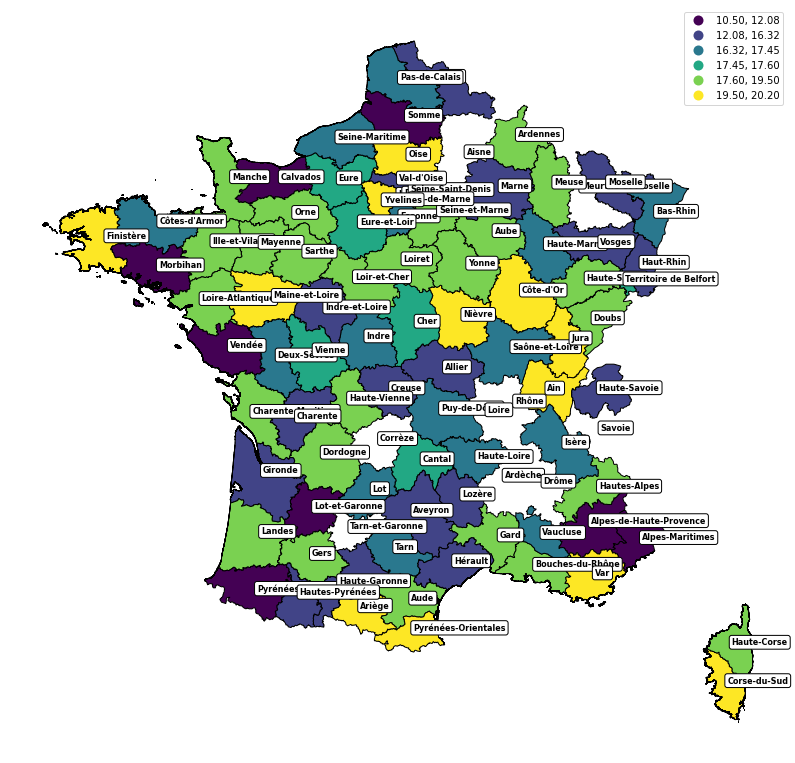

In [3]:
from auxiliary.auxiliary_m import *
frmap(df1, geo)

**<center>Figure 1. The Geographic Variation in Military Mortality Rates</center>**

# 3. Identification

In this paper, Abramitzky et al. (2011) apply the difference-in-differences approach to investigate how the exogenous shock caused by WWI (first difference) and levels of military mortality (second difference) influence marriage outcomes, which are measured by marital status (single, divorced, and widowed) and the proportion of out-of-wedlock births. In addition, the authors adopt the similar method to study the impact of male scarcity, caused by war casualties, on the assortative matching by social class and the age gap between brides and grooms. The idea is summarized as the below table.

**The Difference-in-Differences Approach** 

| **Outcomes**     | **First difference**     | **Second difference**       | **Difference-in-Differences**    |
|------------------|--------------------------|-----------------------------|---------------------------------|
| Marital Status (single/divorced/widowed)  | Marriage outcome changed following the war in regions     | Marriage outcome changed with different levels of military mortality | Impact of military mortality on marriage outcome    |
| The difference between the class of the bride and the groom | Social class changed following the war in regions | Social class changed with different levels of military mortality | Impact of military mortality on assortative matching by social class |
| The difference between the age of the bride and the groom | Age gap changed following the war in regions | Age gap changed with different levels of military mortality | Impact of military mortality on age gap |

**Instrumental Variables (IV) Design**

As pointed out in the related literature, the study on the effect of the male scarcity (sex ratio) on the marriage market can face a problem called omitted variable bias as well as reverse causality. For instance, Abramitzky et al. (2011) emphasize that a low sex ratio could be explained by strong out-immigration. To avoid this issue, the authors adopt the instrumental variables approach (IV), using military mortality as an instrument for the male scarcity since it demonstrates the exogenous geographical variation that affects the sex ratio while the mortality does not directly affect marriage by social class. The below DAG illustrates the mechanism of the IV approach. 

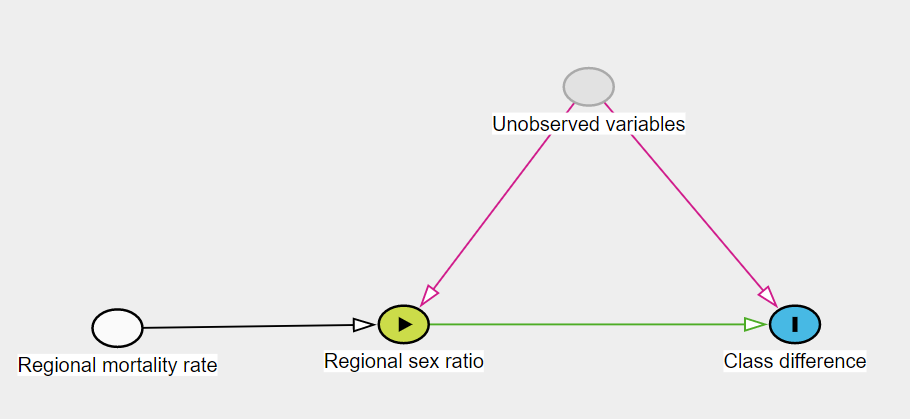

In [4]:
Image(filename='files/IV_causal_graph.PNG', width=800)

**NOTE:** that in the causal graph, the pink arrow expresses the biasing path while the green arrow shows the causal path.

# 4. Empirical Strategy

- **Impact of military mortality on marital status**

Using department-level data from the 1911 and 1921 censuses, Abramitzky et al. (2011) adopt the difference-in-differences method to estimate the impact of male scarcity on marital status and out-of-wedlock births, expressed by the following equation:

\begin{equation}
Y_{dt} = \delta_{d} + \lambda PW_{t} + \alpha M_{d}xPW_{t} + \epsilon_{dt} (1)
\end{equation}

where $Y_{dt}$ is the proportion of men/women of a corresponding marital status (single, divorced, or widowed) in department $d$ at time $t$; $\delta_{d}$ is a department dummy that captures time-invariant department-level factors; $PW_{t}$ is a postwar dummy that equals one if the observation $Y_{dt}$ comes from the 1921 census and zero otherwise; and $M_{d}$ is the military mortality rate in department $d$. The coefficient $M_{d}$x$PW_{t}$ captures the treatment effect. The regression results will be indicated in table 2, section <a href="#5.2.1.-The-Impact-of-Male-Scarcity-on-Marital-Status" data-toc-modified-id="5.2.1.-The-Impact-of-Male-Scarcity-on-Marital-Status">5.2.1. The Impact of Male Scarcity on Marital Status</a>.

- **Impact of military mortality on assortative matching by social class**

To test whether men married up postwar or not, Abramitzky et al. (2011) continues to apply the difference-in-differences regressions where military mortality is the treatment.

\begin{equation}
Y_{dt} = \delta_{d} + \lambda PW_{t} + \alpha M_{d}xPW_{t} + \gamma Z_{idt} + \epsilon_{idt}(2) 
\end{equation}

where $Y_{dt}$ is the difference between the class of the bride and the class of the groom; $\delta_{d}$ is a department dummy that captures time-invariant department-level factors, such as local traditions related to marriage; $PW_{t}$ is a postwar dummy variable that equals one if the wedding took place after the war and zero otherwise; and $M_{d}$ is the military mortality rate in department $d$; $Z_{idt}$ are individual-level controls, such as groom class dummies, age, and whether the marriage took place in a rural area, Abramitzky et al. (2011). 

As expressed in the section 5.2.2 <a href="#C.-Male-Scarcity-and-Assortative-Matching-by-Social-Class" data-toc-modified-id="C.-Male-Scarcity-and-Assortative-Matching-by-Social-Class">C. Male Scarcity and Assortative Matching by Social Class</a>, there are two different definitions of difference between social classes of the bride and the groom. In particular, in table 3, Abramitzky et al. (2011) use own occupation to allocate individuals into classes. Meanwhile, in table 4, they define social class based on father occupation (columns 1-3) or based on background characteristics (columns 5-6).

- **Impact of sex ratio on marriage outcomes**

The following equation demonstrates the IV approach, which is used for evaluating impacts of male scarcity (sex ratio) on marriage outcomes. The military mortality is taken into account as an instrument for the sex ratio to avoid the problem of omitted variable bias. The empirical results for equation 3 will be shown in table 5, section 5.2.2 <a href="#C.-Male-Scarcity-and-Assortative-Matching-by-Social-Class" data-toc-modified-id="C.-Male-Scarcity-and-Assortative-Matching-by-Social-Class">C. Male Scarcity and Assortative Matching by Social Class</a>

\begin{equation}
Y_{dt} = \delta_{d} + \lambda PW_{t} + \alpha SR_{td} + \gamma Z_{idt} + \epsilon_{idt}(3) 
\end{equation}

where $Y_{dt}$ is the difference between the class of the bride and the class of the groom; $SR_{td}$ is the department-level sex ratio, instrumented with military mortality interacted with postwar. Other variables are defined as in equations (1) and (2).

**NOTE:** In equations (1), (2), and (3), the authors cluster standard errors at the department level.

# 5. Replication of Abramitzky et al. (2011)

## 5.1. Data &amp; Descriptive Statistics

Abramitzky et al. (2011) use three different datasets from several sources including the marriage-level data, the French censuses of population, and the regional data related to military casualties.
- **The marriage-level data** is extracted from the TRA dataset of the survey “L'enquête des 3000 familles”, which collected information of 3,000 French couples' offspring during the 1803-1832 period. The survey data includes birth, marriage, and death certificates. The sample size in each region was proportional to its population from the 1806 census to ensure geographical representativeness. Remarkably, in each department, a random sample was drawn among couples whose names started with the letters “TRA” to include names from various local dialects in the sample. The sampling procedure ensures the representativeness of all the social classes (Abramitzky et al., 2011). <br> <br>
- **The French census data and Vital Statistics** are available for the years 1906, 1911, and 1921. In this study, Abramitzky et al. (2011) use the 1911 and 1921 censuses to obtain department-level variables on marital status (single, divorced, and widowed). In the data, the sex ratio was defined as the proportion of the number of males aged 18–59, to the number of females aged 15–49. In addition, the department-level share of out-of-wedlock births in 1911 and 1921 was collected from the Vital Statistics in France. <br> <br>
- **The military mortality data** provides the proportion of military casualties in 22 military regions, following Huber's study (1931). There were 78 departments falling entirely into a military region, allocated the same mortality rate. For 9 departments containing more than one military region, the authors impose a weighted average of the mortality rates of the military regions to be able to construct the mortality rate in each department.

**Table 1. Summary statistics**

In [5]:
from auxiliary.auxiliary_table import *
summary_stats(df)

,Description,Count,Mean,Std,Min,25%,50%,75%,Max
Variables,,,,,,,,,
mortality,Military mortality rate,"5,878",15.04,3.42,10.50,11.90,15.50,17.60,20.20
sr,Sex ratio (#18-59 males/ #15-49 females),"6,113",1.01,0.08,0.86,0.96,1.00,1.06,1.60
sr_39,"Sex ratio (#males/ #females, aged 15-39)","6,113",0.89,0.09,0.75,0.82,0.87,0.95,1.64
sr_49,"Sex ratio (#males/ #females, aged 15-49)","6,113",0.90,0.08,0.78,0.84,0.89,0.96,1.47
agegr,Groom's age,"6,174",28.56,7.96,10.00,24.00,26.00,31.00,77.00
agebr,Bride's age,"6,165",25.16,7.27,11.00,21.00,23.00,27.00,78.00


**Note:** Table 1 is different from table A1 of summary statistics in the original paper, which is not divided into prewar and postwar subgroups.

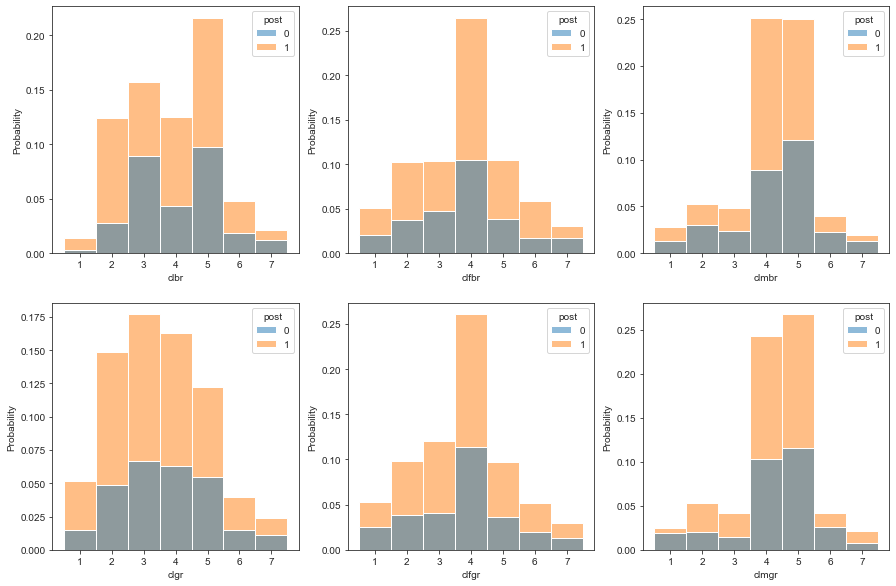

In [6]:
varlist = ['clbr', 'clfbr', 'clmbr', 'clgr', 'clfgr', 'clmgr']
mdist_hue(df, varlist, nrows=2, ncols = 3)

**Note:** prewar (post = 0) and postwar (post = 1)

| **Variable name**     | **Variable label**     | 
|------------------|--------------------------|
|clbr|Bride's class|
|clfbr|(Bride's) father's class|
|clmbr|(Bride's) mother's class|
|clgr |(Groom's) class|
|clfgr|(Groom's) father's class|
|clmgr|(Groom's) mother's class|

**<center>Figure 2. Distribution of social class (prewar and postwar)</center>**

## 5.2. Empirical Results

### 5.2.1. The Impact of Male Scarcity on Marital Status

The estimates from equation 1 in section <a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy">4. Empirical Strategy</a> illustrate that in regions with higher mortality rates, women were likely to remain single postwar. In particular, a 10 percentage point increase in mortality rate led to a 2.7 percentage point increase in the proportion of single women aged 20-29 postwar (see table 2). Meanwhile, the departments with higher casualty ratio witnessed a decrease in share of single men aged 20-29 postwar. This finding implies that male scarcity gave French male aged 20-29 more incentive to marry. 

In addition, mortality rates had a negative impact on divorce. The shares of divorced men and women reduced postwar in departments with higher mortality rates. Specifically, in the 20-29 cohort, the proportion of divorced men and women declined by 0.04 and 0.06 percentage points postwar, respectively, in a department with the mortality rate of 20 percent compared to the 10 percent rate. The effect for the 30-39 female was lower, only 0.13 percentage point. Abramitzky et al. (2011) explain that in departments with higher mortality rates, women had a tendency to stay single and were less likely to marry. Therefore, divorce did not occur in this situation. On the other hand, marriages being able to end in divorce broke down by the deaths of husbands in regions with higher mortality. Moreover, under male scarcity, the men-women matching became more stronger and stable, which were hard to be dissolved. 

**Table 2. The Impact of Male Scarcity on Marital Status by Age Group and Gender**

In [7]:
table_2(df1)

,Single males,Single females,Divorced males,Divorced females,Widowed males,Widowed females
Age group:,,,,,,
15–19,0.0097,0.1091**,NaN,NaN,NaN,NaN
,(0.0059),(0.0430),NaN,NaN,NaN,NaN
20–29,-0.3124***,0.2697***,-0.0043**,-0.0057,0.0031,0.0525*
,(0.1081),(0.0954),(0.0021),(0.0043),(0.0031),(0.0302)
30–39,0.0443,0.0366,-0.0125,-0.0130*,-0.0011,0.2447***
,(0.0840),(0.0467),(0.0079),(0.0070),(0.0081),(0.0496)
40–49,0.1195**,0.0649**,0.0026,-0.0069,0.0016,0.1380***
,(0.0472),(0.0326),(0.0066),(0.0056),(0.0129),(0.0320)


**Note**: 
- Coefficient presented is expressed by the interaction between postwar and military mortality. All regressions consist dummy variables for prewar/postwar and departments. Standard errors are presented in parentheses.

- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level. <br> <br> 

### 5.2.2. The Impact of Male Scarcity on Assortative Matching by Social Class

#### A. Assigning Social Classes Based on the Historical International Social Class Scheme

Using the marriage-level data, Abramitzky et al. (2011) investigate whether men were able to have a better matching in regions with higher levels of male scarcity during WWI. The authors first describe how they allocate inhabitants into social classes. Then they make an effort to verify whether there existed assortative matching by social class before WWI. Finally, authors adopt difference-in-differences and instrumental variables methods in studying how male scarcity affected assortative matching by social class.

For the first step, Abramitzky et al. (2011) use the marriage certificate data to specify occupations of brides, grooms, and their parents to match them with corresponding social classes. Firstly, the authors adopt the Historical International Standard Classification of Occupations (HISCO) in allocating each occupation into one of seven sectors: (1) professional; (2) technical and related workers, administrative and managerial workers; (3) clerical and related workers; (4) sales workers; (5) service workers; (6) agricultural, animal husbandry and forest workers; fishermen, and hunters; and (7) production and related workers, transport equipment operators and laborers. The following table describes an example of common occupations within each class:

| **Class**     | **Women**       | **Men**    |
|-------------------|-------------------------|------------------------|
| 1| Accountant, professor        | Accountant, engineer               |
| 2 | Store employee, bank employee | Railway company employee, store employee    |                         
| 3                 | Seamstress, cook        | Mechanic, constructor       |
| 4                 | Farmer, winegrower       | Farmer, winegrower     |
| 5                 | Domestic, linen maid        | Driver, domestic        |
| 6                 | Factory worker, worker      | Factory worker, worker       |
| 7                 | Day laborer, farm worker       | Day laborer, farm worker       |

Secondly, Abramitzky et al. (2011) use the Historical International Social Class Scheme (HISCLASS) to map occupational codes into social classes. The HISCLASS system merges each of the 1,600 HISCO occupations into one of 12 social classes, shortened to following 7 social classes:
- Class 1: Higher managers and professionals (highest)
- Class 2: Lower managers and professionals, clerical and sales personnel 
- Class 3: Foremen and skilled workers 
- Class 4: Farmers and fishermen 
- Class 5: Lower skilled workers 
- Class 6: Unskilled workers 
- Class 7: Lower-skilled and unskilled farm workers (lowest).

#### B. Prewar Assortative Matching by Social Class <font color='blue'>(Bootstrap Simulation)</font>

The section describes the authors' motivation in investigating how strong marriage matching by socal class was before WWI. To verify whether individuals married those within their social classes or randomly, Abramitzky et al. (2011) come up with usage of prewar data to investigate the distribution of social distance, which is defined as the class of the bride minus the class of the groom (classdiff). The authors then construct the well-known null hypothesis, the random matching, which specifies that prewar couples married randomly. To do so, Abramitzky et al. (2011) adopt the bootstrapping approach to create 95 percent bootstrap confidence intervals for the distribution of social difference under the null hypothesis.

**<font color='blue'>Bootstrap simulation</font>**

In this section, I sketch the algorithm of the bootstrapping method applied by Abramitzky et al. (2011). Specifically, suppose that **N** is the number of prewar marriages. From the realized distribution of groom classes, they draw **N** grooms randomly with replacement. Similarly, they draw **N** brides randomly with replacement from the realized distribution of bride classes. Then they match the list of grooms with the list of brides to derive the distribution of social distances corresponding to random samples. Finally, Abramitzky et al. (2011) repeat this process **1,000 times**, hence, successfully construct the 95 percent confidence interval. The simulation results are represented in figures within subsections Panel A and Panel B. 

In the original paper, Abramitzky et al. (2011) reject the null hypothesis associated with the random matching for social classes. In particular, below figures illustrate that the probability that men married women within the same social classes was too high (44 percent for own occupation and 45 percent for father's occupation), compared with the possible probabilities in the random matching, 18-24 percent.

In [8]:
from auxiliary.auxiliary_bootstrap_sm import *

**Panel A. Class defned by own occupation**

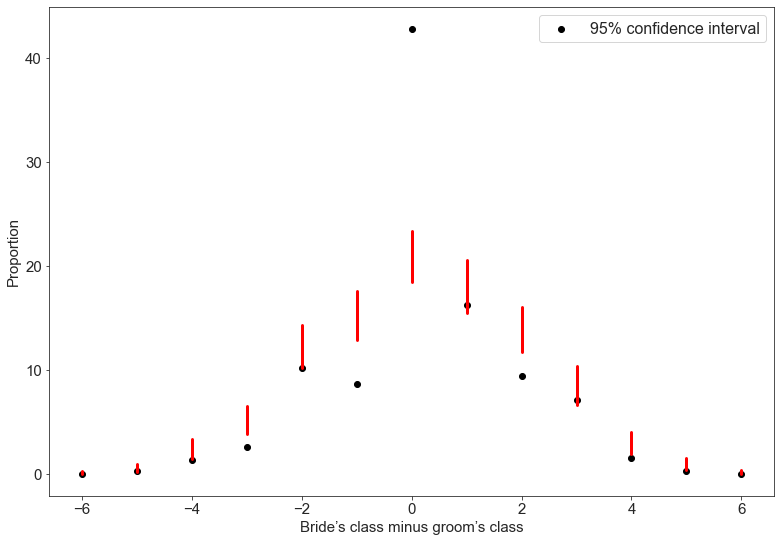

In [9]:
bootstrap_sm(df, 'clgr', 'clbr')

**Panel B. Class defned by father’s occupation**

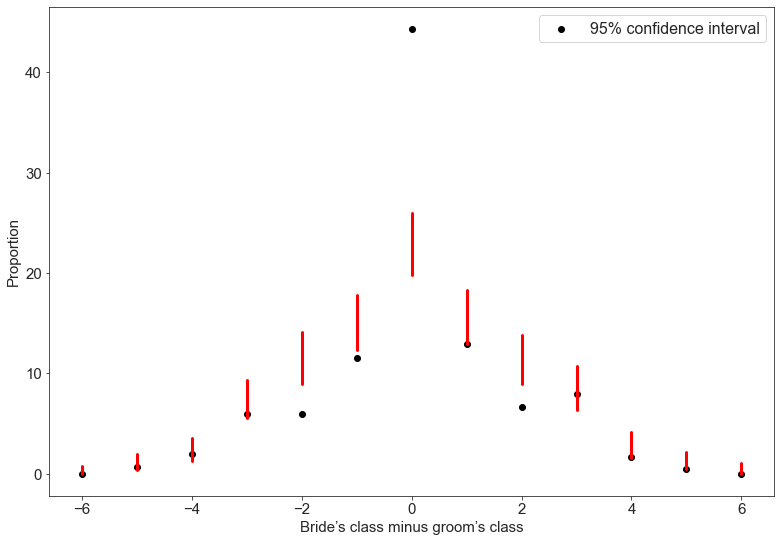

In [10]:
bootstrap_sm(df, 'clfgr', 'clfbr')

**NOTE:** The simulation results from my work in Python are consistent with those in Mata Stata, demonstrated by Abramitzky et al. (2011).

#### C. Male Scarcity and Assortative Matching by Social Class

Table 3 shows the estimation results from equation (2) in section <a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy">4. Empirical Strategy</a>. Remarkably, the own occupations of men and women were taken into account to allocate couples into social classes. In addition, "class difference" in table 3 means the difference between the social class of the bride and the class of the groom. A lower value of the "class difference" means that the man "married up". "married down" is a dummy variable for whether the groom married a low-class bride. 

Abramitzky et al. (2011) assure that compared with prewar, the possibility that men had a better matching in regions with higher mortality rates was high. The coefficient of interest in column "married down" can be expressed as follows. Suppose there were two identical regions prewar. After WWI, the probability that a given groom married down declined by approximately 10 percentage points in the region that its mortality rate was 10 percent higher than another region (see table 3).

**Table 3. Impact of Male Scarcity on Assortative Matching by Class (OLS) (Classes defined by own occupation)**

In [11]:
sample3 = sample_a(df, 'clbr', 'clgr')
table_3(sample3)

,All,classes of,groom,Excluding,grooms of class,1 and 2
,,,,,,
Dependent variable,Class difference,Married down,Low-class bride,Class difference,Married down,Low-class bride
Percent of soldiers killed x postwar,-0.0201*,-0.0095**,-0.0166***,-0.0350***,-0.0168***,-0.0231***
,(0.0105),(0.0045),(0.0048),(0.0126),(0.0043),(0.0056)
Postwar,0.1964,0.0918,0.2231***,0.4908***,0.2404***,0.3381***
,(0.1460),(0.0648),(0.0664),(0.1873),(0.0597),(0.0821)
Rural,0.1905**,0.0320,-0.0341,0.1914**,0.0319,-0.0357
,(0.0852),(0.0291),(0.0299),(0.0915),(0.0292),(0.0328)
Bride’s age (/100),-0.5815,0.0870,-0.0952,-0.9234*,-0.1639,-0.0844
,(0.4737),(0.1597),(0.1425),(0.4887),(0.1851),(0.1877)


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Standard errors, clustered at the department level, are presented in parentheses.
- My OLS replication with clustered standard errors results in the consistency with results of the original paper.

**Table 4. Impact of Male Scarcity on Assortative Matching by Class (OLS) (alternative definitions of class)**

In [12]:
sample4_1 = sample_a(df, 'clfbr', 'clfgr') 
sample4 = sample_a(df, 'clbr', 'clgr') # use the function 'sample_a' to convert clbr and 'clgr' to numeric
sample4_2 = sample4_2_b(sample4) 
table_4_t(sample4_1, sample4_2)

,Class,defined by,father occupation,Classes imputed,using background,characteristics
,,,,,,
Dependent variable,Class difference,Married down,Low-class bride,Class difference,Married down,Low-class bride
Percent of soldiers killed x postwar,0.0092,-0.0025,-0.0054,-0.0056**,-0.0062**,-0.0021
,(0.0159),(0.0049),(0.0054),(0.0023),(0.0025),(0.0026)
Postwar,-0.1741,0.0061,0.0624,0.0878***,0.1076***,0.0325
,(0.2390),(0.0732),(0.0797),(0.0298),(0.0349),(0.0360)
Rural,0.1526,0.0156,-0.0978***,0.3012***,0.2094***,0.3972***
,(0.0977),(0.0302),(0.0305),(0.0234),(0.0189),(0.0263)
Bride’s age (/100),-2.4584**,-0.1100,-0.5797**,0.3621,0.3593**,0.0956
,(1.0504),(0.2237),(0.2555),(0.2854),(0.1584),(0.1171)


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Standard errors, clustered at the department level, are presented in parentheses.

**Table A5 (Appendix) — Impact of Male Scarcity on Assortative Matching by Class (OLS, No Regional Fixed Effects)**

**Panel A**

In [13]:
samplea5_1 = sample_a(df, 'clbr', 'clgr')
samplea5_2 = sample_a(df, 'clfbr', 'clfgr')
table_a5([samplea5_1, samplea5_2]) 

,Class,defined by own,occupation,Class,defined by father,occupation
,,,,,,
Dependent variable,Class difference,Married down,Low-class bride,Class difference,Married down,Low-class bride
Panel A,NaN,NaN,NaN,NaN,NaN,NaN
Percent of soldiers killed x postwar,-0.0181*,-0.0074,-0.0140***,0.0045,-0.0034,-0.0065
,(0.0108),(0.0045),(0.0052),(0.0159),(0.0047),(0.0054)
Percent of soldiers killed,0.0247,0.0046,0.0022,0.0139,0.0022,0.0024
,(0.0181),(0.0080),(0.0103),(0.0152),(0.0054),(0.0051)
Postwar,0.1946,0.0692,0.1959***,-0.0927,0.0193,0.0810
,(0.1519),(0.0653),(0.0728),(0.2486),(0.0715),(0.0801)
Rural,0.3776***,0.0986***,0.0638,0.1608*,0.0205,-0.0847***


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Standard errors, clustered at the department level, are presented in parentheses.

**Panel B**

In [14]:
sample_a5b = sample_a(df, 'clbr', 'clgr') # use the function 'sample_a' to convert clbr and 'clgr' to numeric
sample_a5b = sample4_2_b(sample_a5b) 
table_a5_b(sample_a5b)

,Class imputed,from background,characteristics
,,,
Dependent variable,Class difference,Married down,Low-class bride
panel B,NaN,NaN,NaN
Percent of soldiers killed x postwar,-0.0061***,-0.0060**,-0.0025
,(0.0024),(0.0024),(0.0026)
Percent of soldiers killed,0.0209**,0.0127***,0.0156***
,(0.0084),(0.0042),(0.0054)
Postwar,0.0979***,0.1053***,0.0379
,(0.0305),(0.0329),(0.0356)
Rural,0.3410***,0.2231***,0.4237***


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Standard errors, clustered at the department level, are presented in parentheses.

**Table 5. Impact of Male Scarcity on Assortative Matching by Class (IV)** (equivalent to table 5 in the original paper)

**Panel A. Stage 2 regressions**

In [15]:
df5_1 = sample_a(df, 'clbr', 'clgr')
df5_2 = sample_a(df, 'clfbr', 'clfgr')
table_5_b(df5_1, df5_2)

,Class,defined by own,occupation,Class,defined by father,occupation
,,,,,,
Dependent variable,Class difference,Married down,Low-class bride,Class difference,Married down,Low-class bride
Panel A. Stage 2 regressions,NaN,NaN,NaN,NaN,NaN,NaN
Sex ratio (men/women),4.22*,2.022**,3.124***,-2.292,0.632,1.492*
,0.05,0.019,0.002,0.573,0.588,0.088
Postwar,0.245,0.116*,0.23***,-0.224,0.021,0.116*
,0.124,0.072,0.001,0.5,0.824,0.086
Rural,0.197**,0.036,0.008,0.152,0.016,-0.074***
,0.02,0.226,0.803,0.102,0.593,0.001
Bride’s age (/100),-0.497,0.126,-0.001,-2.523**,-0.091,-0.365*


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Different from the original paper, in the table, I use **p-value** instead of clustered standard errors since I have some troubles in extracting standard errors from the **linearmodels** package in Python. However, IV coefficients from my replication are consistent with authors' results.

**Panel B. Stage 1 regressions**

In [16]:
table_5_c(df5_1, df5_2)

,Class,defined by own,occupation,Class,defined by father,occupation
,,,,,,
Dependent variable,Class difference,Married down,Low-class bride,Class difference,Married down,Low-class bride
Panel B. Stage 1 regressions,NaN,NaN,NaN,NaN,NaN,NaN
Percent of soldiers killed x postwar,-0.0045***,-0.0045***,-0.0045***,-0.0045***,-0.0045***,-0.0045***
,(0.0010),(0.0010),(0.0010),(0.0012),(0.0012),(0.0012)
Postwar,-0.0135,-0.0135,-0.0135,-0.0135,-0.0135,-0.0135
,(0.0168),(0.0168),(0.0168),(0.0209),(0.0209),(0.0209)
Rural,-0.0002,-0.0002,-0.0002,0.0003,0.0003,0.0003
,(0.0011),(0.0011),(0.0011),(0.0014),(0.0014),(0.0014)
Bride’s age (/100),-0.0107,-0.0107,-0.0107,-0.0236,-0.0236,-0.0236


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Standard errors, clustered at the department level, are presented in parentheses.

Table A6 shows estimation results of OLS regression from equation (3) of section <a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy">4. Empirical Strategy</a>. The OLS coefficient associated with the sex ratio is much smaller than that of the IV model, 0.74 (OLS) compared to 4.22 (IV). Hence, Abramitzky et al. (2011) suggest that taking into account endogeneity of the sex ratio is crucial.

**Table A6 (Appendix). Impact of Male Scarcity on Assortative Matching by Class (OLS equivalent of IV)**

In [17]:
sample6_1 = sample_a(df, 'clbr', 'clgr')
sample6_2 = sample_a(df, 'clfbr', 'clfgr')
table_a6([sample6_1, sample6_2]) 

,Class,defined by own,occupation,Class,defined by father,occupation
,,,,,,
Dependent variable,Class difference,Married down,Low-class bride,Class difference,Married down,Low-class bride
Sex ratio (males/females),0.7417,0.4305,0.9622***,0.4109,0.5336*,0.3625
,(0.8417),(0.3012),(0.3221),(1.1004),(0.2921),(0.4397)
Postwar,-0.0402,-0.0126,0.0577,-0.0036,0.0113,0.0084
,(0.1053),(0.0316),(0.0379),(0.0998),(0.0282),(0.0397)
Rural,0.2019**,0.0413,-0.0254,0.1423,0.0096,-0.0942***
,(0.0841),(0.0292),(0.0301),(0.0980),(0.0288),(0.0289)
Bride’s age (/100),-0.5328,0.0891,-0.0845,-1.9581**,-0.0072,-0.4908**
,(0.4513),(0.1540),(0.1381),(0.9423),(0.2015),(0.2210)


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Standard errors, clustered at the department level, are presented in parentheses.

### 5.2.3. The Impact of Male Scarcity on Spousal Age Gap and Age at Marriage

Table 6 shows the impact of male scarcity on the assortative matching by age. According to Abramitzky et al. (2011), the average groom was 3.8 years older than his bride prewar. Hence, the average age gap, measured by taking the age of the bride minus the age of the groom, is negative. In column 1 of table 6, the coefficient associated with postwar interacted with mortality is positive and statistically significant, implying that the age gap between brides and grooms shrank (observed in a absolute value) in regions with higher mortality postwar.

**Table 6. Impact of Male Scarcity on Assortative Matching by Age (OLS)**

In [18]:
table_6(df)

,(1),(2),(3)
,,,
Dependent variable,Age difference,Groom’s age,Bride’s age
Percent of soldiers killed x postwar,0.0916**,0.0195,0.0827**
,(0.0361),(0.0384),(0.0381)
Postwar,-0.6263,-0.9312*,-1.1643*
,(0.5361),(0.5195),(0.6155)
Rural,-0.3248***,0.3311,-0.3400*
,(0.1255),(0.2151),(0.1842)
Groom class dummies,Yes,Yes,No
Bride class dummies,Yes,No,Yes


**Note**: 
- $\ast\ast\ast$ Significant at the 1 percent level, $\ast\ast$ Significant at the 5 percent level, $\ast$ Significant at the 10 percent level.
- Standard errors, clustered at the department level, are presented in parentheses.

# 6. Conclusion

Overall, the results in the notebook strongly support the empirical findings, reported by Abramitzky et al. (2011). Based on the transparent research methods which are represented in the paper and Stata do-files, I can comprehensively document and (almost) exactly replicate all results of the original paper, including OLS and IV regressions as well as the bootstrapping method. 

Abramitzky et al. (2011) find that a male scarcity in the population attributed to war-related casualty benefits men by giving them better assortative matching in marriage markets. They conclude that in regions with higher mortality, women were less likely to marry postwar, and if possible, they married at an older age, resulting in a decline in the age gap between brides and grooms.

# 7. References

* **Angrist, Josh. (2002)**. How Do Sex Ratios Affect Marriage and Labor Markets: Evidence from America’s Second Generation. *Quarterly Journal of Economics*, 117(3), 997–1038.

* **Becker, Gary S. (1973)**. Theory of Marriage: Part I. *Journal of Political Economy*, 81(4): 813–46. 

* **Becker, Gary S. (1974)**. A Theory of Marriage: Part II. *Journal of Political Economy*, 82(2): S11–26

* **Charles, Kerwin Kofi, and Ming Ching Luoh. (2010)**. Male Incarceration, the Marriage Market, and Female Outcomes. *Review of Economics and Statistics*, 92(3), 614–27.

* **Cox, Oliver C. (1940)**. Sex Ratio and Marital Status among Negroes. *American Sociological Review*, 6(5): 937–47.

* **Easterlin, Richard A. (1961)**. The American Baby Boom in Historical Perspective. *American Economic Review*, 51(5): 869–911.

Notebook by Minh-Tri Hoang | Find me on GitHub at https://github.com/mtrihoang.